In [40]:
import numpy as np
import matplotlib.pyplot as plt
import quandl
import pandas as pd
import pandas_datareader 
import datetime
import pandas_datareader.data as web

In [41]:
# Lấy dữ liệu từ data source
start = datetime.datetime(2017, 1, 1)
end = datetime.datetime(2018, 1, 1)
google = web.DataReader("NKE", 'quandl', start, end, api_key = 'XWq2933x7YJEv_XpzmJU')
google.head() 

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2017-12-29,63.21,63.37,62.55,62.55,5195058.0,0.0,1.0,63.21,63.37,62.55,62.55,5195058.0
2017-12-28,63.00,63.32,62.85,62.95,3950551.0,0.0,1.0,63.00,63.32,62.85,62.95,3950551.0
2017-12-27,63.56,63.60,62.77,62.95,6091767.0,0.0,1.0,63.56,63.60,62.77,62.95,6091767.0
2017-12-26,62.90,63.89,62.81,63.65,4438641.0,0.0,1.0,62.90,63.89,62.81,63.65,4438641.0
2017-12-22,61.21,63.54,60.13,63.29,20369725.0,0.0,1.0,61.21,63.54,60.13,63.29,20369725.0


In [42]:
adj_close = google['AdjClose']

In [43]:
# Tính daily return
adj_reversed = list(reversed(adj_close))
def daily_return(adj_reversed):
    returns = []
    for i in range(0, len(adj_reversed)-1):
        today = adj_reversed[i+1]
        yesterday = adj_reversed[i]
        
        daily_return = (today - yesterday)/yesterday
        
        returns.append(daily_return)
    return returns      
returns = daily_return(adj_reversed)

In [49]:
# Tính muy và sigma
mu = np.mean(returns) * 250.            
sig = np.std(returns)* np.sqrt(250.)

print('muy =', mu)
print('sigma =', sig)

muy = 0.21933378152846525
sigma = 0.21767281685789233


In [45]:
# Tham số đầu vào
N = 250     # Giả định có 250 ngày giao dịch/ năm  
T = 1.0 
dt=T/N
t = np.arange(0.0, 1.0, dt)

In [46]:
# Tạo chuyển động Brown
def BrownianMotion(seed, N):   
    np.random.seed(seed)
    Z = np.random.randn(N)     #random variables
    Z[0] = 0
    dW = np.sqrt(dt)* Z        #single Brownian increment
    W = np.cumsum(dW)          #Brownian path
    return W

In [47]:
# Tạo chuyển động Brown hình học (nghiệm của phương trình Black-Scholes)
def GBM_Exact(So, mu, sigma, W, N, t):  
    S = []
    S.append(So) 
    for i in range(1,N):
        drift = (mu - 0.5 * sigma**2) *t[i]       #Calculating the deterministic part
        diffusion = sigma * W[i-1]                #Calculating the stochastic part
        S_i = So * np.exp(drift + diffusion)
        S.append(S_i)      
    return S

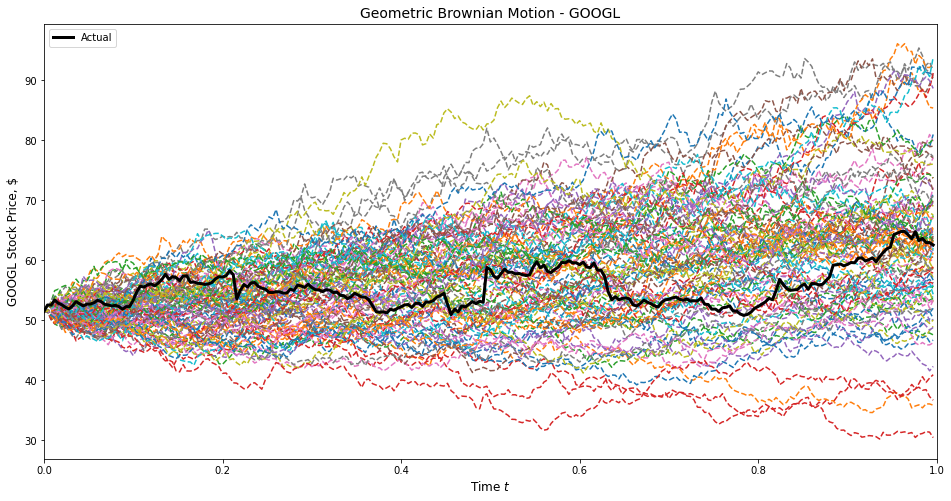

In [51]:
# Vẽ đồ thị 
So = adj_reversed[0]
plt.figure(figsize = (16, 8))

for seed in range(1, 100):   
    W = BrownianMotion(seed, N)  
    solution = GBM_Exact(So, mu, sig, W, N, t)
    plt.plot(t, solution, ls='--')
    
plt.plot(t, adj_reversed, label = 'Actual', color = "black", linewidth = 3)
plt.xlabel('Time $t$', fontsize = 12)
plt.ylabel('GOOGL Stock Price, $', fontsize = 12)
plt.title('Geometric Brownian Motion - GOOGL', fontsize = 14)

plt.legend(loc = 'upper left')
axes = plt.gca()
axes.set_xlim([0,T])

plt.show()